In [57]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
X = 6 * np.random.rand(100, 1) - 3
Y = 0.5 * X**2 + 1.5*X + 2  + np.random.randn(100, 1)
## quadratic equation -> Y = 0.5X^2 + 1.5X + 2 + noise
print(Y)

[[ 6.3991816 ]
 [ 1.68045475]
 [ 2.16240964]
 [ 5.20071565]
 [ 1.8179827 ]
 [ 4.80038258]
 [ 3.79459416]
 [ 1.35634706]
 [ 1.89497551]
 [ 1.34572494]
 [ 3.16008851]
 [ 1.13855921]
 [ 1.9530213 ]
 [ 1.79526428]
 [ 1.23887026]
 [ 1.53783778]
 [11.71993181]
 [ 7.93086234]
 [ 0.69441822]
 [10.06397627]
 [ 3.25177814]
 [ 2.47742223]
 [ 1.83380004]
 [ 3.61797987]
 [ 0.18164876]
 [ 5.03429921]
 [ 1.86194031]
 [ 1.82231807]
 [ 1.24149196]
 [ 2.14982919]
 [ 0.30415876]
 [ 2.15771341]
 [ 6.41729444]
 [10.99530942]
 [ 1.8278963 ]
 [ 0.36195198]
 [ 0.6446435 ]
 [ 1.41876328]
 [ 4.67997377]
 [ 0.67240607]
 [ 5.61991962]
 [ 0.73410835]
 [ 6.37550823]
 [ 9.79842018]
 [ 8.19827782]
 [ 6.43380753]
 [ 8.20247979]
 [ 9.41055008]
 [ 1.40362658]
 [ 0.54861605]
 [ 1.40023866]
 [ 2.59405044]
 [ 3.48421216]
 [ 0.23059473]
 [ 4.88140644]
 [ 3.14752773]
 [ 0.99092134]
 [ 8.25927556]
 [10.60538428]
 [ 0.171876  ]
 [ 3.91826696]
 [ 0.50518019]
 [ 8.21511091]
 [ 1.75100799]
 [ 6.33919258]
 [ 0.721557  ]
 [-0.32619

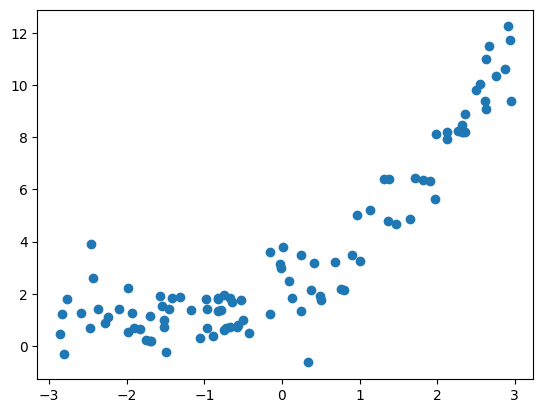

In [59]:
plt.scatter(X, Y)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [61]:
## let's try linear regression first
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [62]:
regression.fit(X_train, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [63]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, regression.predict(X_test))
print(score)

0.8334914133521718


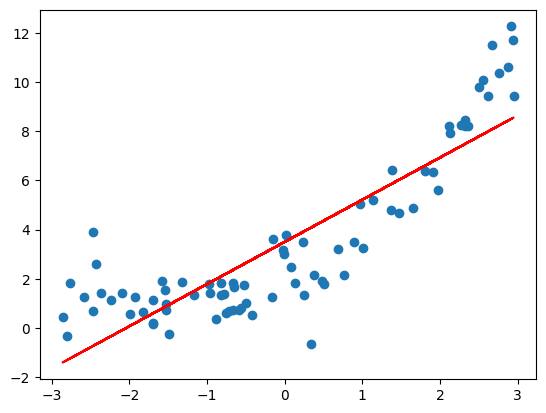

In [64]:
## Let's vistualize this model
plt.plot(X_train, regression.predict(X_train), color='red')
plt.scatter(X_train, Y_train)

In [65]:
## let's use polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [66]:
polynomial = PolynomialFeatures(degree=2, include_bias=True)
## include_bias is used to add the coeffiecient 1 also
X_train_poly = polynomial.fit_transform(X_train)
X_test_poly = polynomial.transform(X_test)
print(X_train_poly)
## this gives a 2d array with 3 columns -> [1, X, X^2]

[[ 1.00000000e+00 -1.88655576e-02  3.55909264e-04]
 [ 1.00000000e+00 -1.03437787e-02  1.06993758e-04]
 [ 1.00000000e+00 -1.31699971e+00  1.73448824e+00]
 [ 1.00000000e+00  1.81400791e+00  3.29062469e+00]
 [ 1.00000000e+00  2.75610625e+00  7.59612167e+00]
 [ 1.00000000e+00 -1.54764094e+00  2.39519249e+00]
 [ 1.00000000e+00  1.97720103e+00  3.90932393e+00]
 [ 1.00000000e+00  2.94905367e+00  8.69691753e+00]
 [ 1.00000000e+00 -8.22661441e-01  6.76771847e-01]
 [ 1.00000000e+00 -1.92687671e+00  3.71285387e+00]
 [ 1.00000000e+00 -1.69768196e+00  2.88212404e+00]
 [ 1.00000000e+00  2.61656735e+00  6.84642472e+00]
 [ 1.00000000e+00  2.44056241e-01  5.95634486e-02]
 [ 1.00000000e+00 -2.58999918e+00  6.70809574e+00]
 [ 1.00000000e+00  2.32059554e+00  5.38516367e+00]
 [ 1.00000000e+00  1.36612187e+00  1.86628895e+00]
 [ 1.00000000e+00 -2.81029683e+00  7.89776830e+00]
 [ 1.00000000e+00 -6.65612159e-01  4.43039546e-01]
 [ 1.00000000e+00 -8.83715220e-01  7.80952589e-01]
 [ 1.00000000e+00  2.94275086e+

In [67]:
## we will also include the bias parameter
polynomial_regression = LinearRegression()
polynomial_regression.fit(X_train_poly, Y_train)
score_poly = r2_score(Y_test, polynomial_regression.predict(X_test_poly))
print(score_poly)

0.9447789454173774


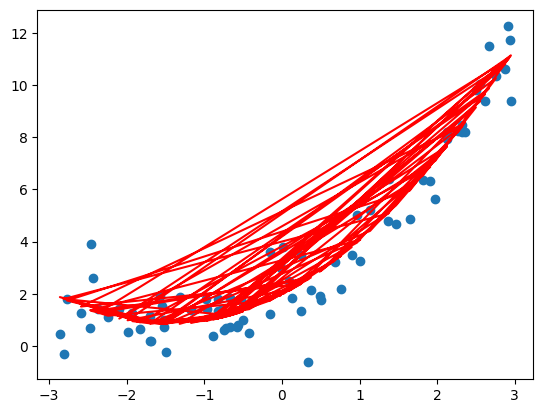

In [68]:
plt.plot(X_train, polynomial_regression.predict(X_train_poly), color='red')
plt.scatter(X_train, Y_train)

In [69]:
## Prediction of new Data
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = polynomial.transform(X_new)
print(X_new)
print(X_new_poly)

[[-3.        ]
 [-2.96984925]
 [-2.93969849]
 [-2.90954774]
 [-2.87939698]
 [-2.84924623]
 [-2.81909548]
 [-2.78894472]
 [-2.75879397]
 [-2.72864322]
 [-2.69849246]
 [-2.66834171]
 [-2.63819095]
 [-2.6080402 ]
 [-2.57788945]
 [-2.54773869]
 [-2.51758794]
 [-2.48743719]
 [-2.45728643]
 [-2.42713568]
 [-2.39698492]
 [-2.36683417]
 [-2.33668342]
 [-2.30653266]
 [-2.27638191]
 [-2.24623116]
 [-2.2160804 ]
 [-2.18592965]
 [-2.15577889]
 [-2.12562814]
 [-2.09547739]
 [-2.06532663]
 [-2.03517588]
 [-2.00502513]
 [-1.97487437]
 [-1.94472362]
 [-1.91457286]
 [-1.88442211]
 [-1.85427136]
 [-1.8241206 ]
 [-1.79396985]
 [-1.7638191 ]
 [-1.73366834]
 [-1.70351759]
 [-1.67336683]
 [-1.64321608]
 [-1.61306533]
 [-1.58291457]
 [-1.55276382]
 [-1.52261307]
 [-1.49246231]
 [-1.46231156]
 [-1.4321608 ]
 [-1.40201005]
 [-1.3718593 ]
 [-1.34170854]
 [-1.31155779]
 [-1.28140704]
 [-1.25125628]
 [-1.22110553]
 [-1.19095477]
 [-1.16080402]
 [-1.13065327]
 [-1.10050251]
 [-1.07035176]
 [-1.04020101]
 [-1.01005

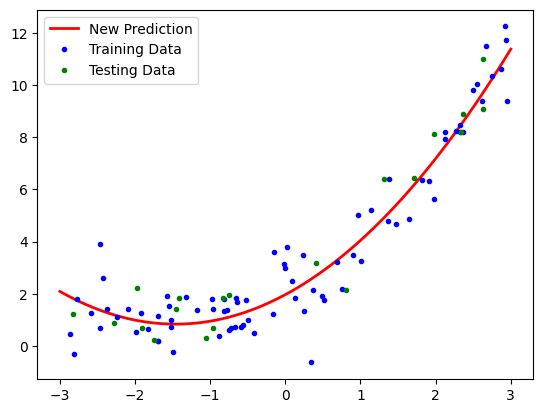

In [72]:
Y_new_predict = polynomial_regression.predict(X_new_poly)
# print(Y_new_predict)
plt.plot(X_new, Y_new_predict, linewidth=2,  color='red', label='New Prediction')
plt.plot(X_train, Y_train, "b.", label='Training Data')
plt.plot(X_test, Y_test, "g.", label='Testing Data')
plt.legend()
plt.show()

## Pipelining

In [73]:
## Pipelining is the method to streamline the process of applying multiple transformations and a final estimator. in this we can simultaneously apply polynomial features and linear regression
from sklearn.pipeline import Pipeline

In [79]:
def poly_pipeline(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_regression = LinearRegression()

    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_regression", lin_regression)
    ])
    poly_regression.fit(X_train, Y_train)
    Y_new_predict = poly_regression.predict(X_new)

    ## plotting predicted line
    plt.plot(X_new, Y_new_predict, linewidth=2,  label=f'Degree {degree} Prediction')
    plt.plot(X_train, Y_train, "b.", label='Training Data')
    plt.plot(X_test, Y_test, "g.", label='Testing Data')
    plt.legend()
    plt.show()

    z_score = r2_score(Y_test, poly_regression.predict(X_test))
    print(f"R2 Score for degree {degree} is: {z_score}")
    


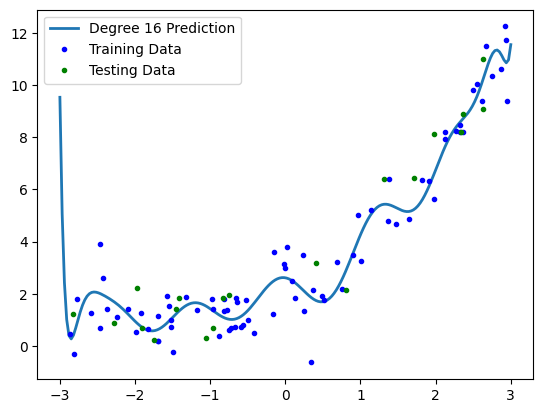

R2 Score for degree 16 is: 0.9329275407868642


In [86]:
poly_pipeline(degree=16)


NameError: name 'poly_regression' is not defined